## Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# distributions
import scipy.integrate as integrate
from scipy.integrate import quad, quad_vec
from scipy.stats import invgamma
from scipy.stats import levy
from scipy.special import gamma, erfinv

import time
from datetime import datetime, timedelta

import sys
import importlib # ref: https://askubuntu.com/questions/144698/find-a-file-by-name-using-command-line
import seaborn as sns

import os

In [2]:
sys.path.append('../tools')
import tools

In [3]:
importlib.reload(tools)

<module 'tools' from '../tools/tools.py'>

In [4]:
# set pandas option
pd.set_option('display.max_rows', 100)

## Download Data

In [5]:
# download and store data in a file
df = pd.read_csv('data/apple_cleaned.csv')

In [6]:
# decide whether you use sample or not
sample = True

if sample:
    data = df[df['date']< '2017-01-30']
    
else:
    data = df.copy()

## Conducting Analysis

## Fitting Distribution

### Fitting Levy Distribution

#### Not fixing location parameter 

In [7]:
### Get a daily estimate of the parameter and then take and average
c_daily_float = []

days = data['date'].unique()

for day in days:
    
    # estimate levy parameters
    c = levy.fit(data.loc[data['date']==day,]['delta_ts'].dropna(), #floc = 0,
                )[1]
    
    # append it to the list
    c_daily_float.append(c)


/Users/kotakikuchi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/kotakikuchi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


In [8]:
### Get a 30 minute block estimate of the parameter and then take an average
c_30_minutes_float = []

blocks = data['bin'].unique()

# for each day
for day in days:
    
    # for each block
    for block in blocks:
        
        # estimate parameters
        c = levy.fit(data.loc[(data['date']==day) & (data['bin'] == block),]['delta_ts'].dropna(), #floc = 0,
                    )[1]
        
        # append the result
        c_30_minutes_float.append(c)

In [9]:
## get an estimate using the entier data
c_entire = invgamma.fit(data.loc[data['date']==day,]['delta_ts'].dropna())[1]

In [36]:
summaries = pd.DataFrame(
[np.mean(c_daily_float),
 np.mean(c_30_minutes_float),
 c_entire],
    columns = ['$c$'],
    index = ['Daily Block', '30 Minutes Block', 'Entire Data']
)

In [37]:
summaries

,$c$
Daily Block,6.599430e-05
30 Minutes Block,2.182191e-02
Entire Data,2.915776e-07


In [42]:
print(summaries.to_latex( caption = 'Estimated scale parameter for the Levy distribution of the first-hitting times in seconds for Apple in 2017',
                        float_format="%.2",
                        formatters = {'$c$': "{:.2E}".format,
                                     },
                        position = 'H',
                         escape=False))

\begin{table}[H]
\centering
\caption{Estimated scale parameter for the Levy distribution of the first-hitting times in seconds for Apple in 2017}
\begin{tabular}{lr}
\toprule
{} &      $c$ \\
\midrule
Daily Block      & 6.60E-05 \\
30 Minutes Block & 2.18E-02 \\
Entire Data      & 2.92E-07 \\
\bottomrule
\end{tabular}
\end{table}



<ipython-input-42-c472c3b4df94>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summaries.to_latex( caption = 'Estimated scale parameter for the Levy distribution of the first-hitting times in seconds for Apple in 2017',


### Plots

#### $c$ fixed location

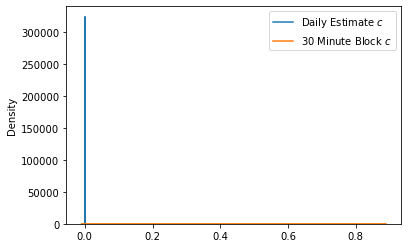

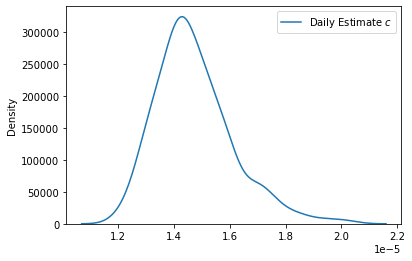

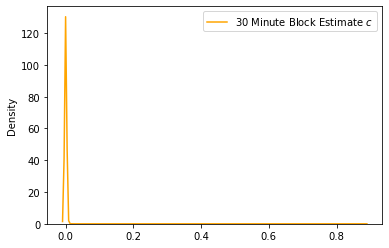

In [63]:
### plotting the scale and shape parameters
sns.kdeplot(c_daily, label = r"Daily Estimate $c$")
sns.kdeplot(c_30_minutes, label = r"30 Minute Block $c$")


#plt.title(r'Density Plot of $c$ (Location Parameter = 0)')
plt.legend()


#plt.savefig('figures/parameters/c_density', facecolor='w')
plt.show()
plt.close()


#sns.kdeplot(c_daily, label = r"Daily Estimate $c$")
#plt.title(r'Density Plot of $c$ (Location Parameter = 0)')
plt.legend()


#plt.savefig('figures/parameters/c_density_daily', facecolor='w')
plt.show()
plt.close()

sns.kdeplot(c_30_minutes, label = r"30 Minute Block Estimate $c$",
           color = 'orange')
#plt.title(r'Density Plot of $c$ (Location Parameter = 0)')
plt.legend()


#plt.savefig('figures/parameters/c_density_30_min', facecolor='w')
plt.show()
plt.close()

#### $c$ floating

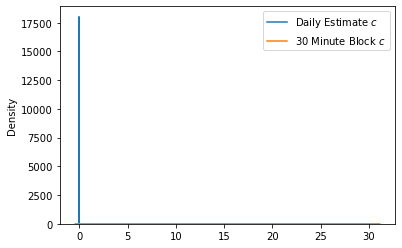

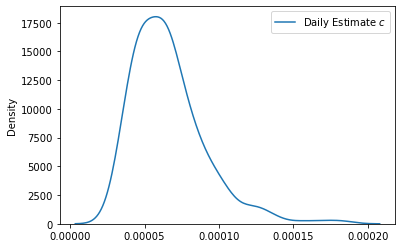

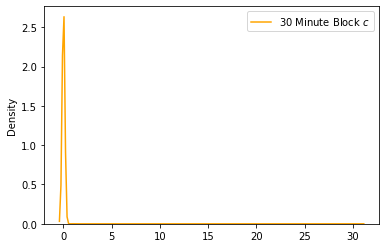

In [64]:
### plotting the scale and shape parameters
sns.kdeplot(c_daily_float, label = r"Daily Estimate $c$")
sns.kdeplot(c_30_minutes_float, label = r"30 Minute Block $c$")
#plt.title(r'Density Plot of $c$ (Floating Location Parameter)')
plt.legend()
#plt.savefig('figures/parameters/c_density_float', facecolor='w')
plt.show()
plt.close()



sns.kdeplot(c_daily_float, label = r"Daily Estimate $c$")
#plt.title(r'Density Plot of $c$ (Floating Location Parameter)')
plt.legend()
#plt.savefig('figures/parameters/c_density_daily_float', facecolor='w')
plt.show()
plt.close()


sns.kdeplot(c_30_minutes_float, label = r"30 Minute Block $c$",
            color = 'orange')
#plt.title(r'Density Plot of $c$ (Floating Location Parameter)')
plt.legend()
#plt.savefig('figures/parameters/c_density_30_min_float', facecolor='w')
plt.show()
plt.close()